# @WeRateDogs® Twitter Analysis

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', None)

### Files Used:
* twitter_archive_enhanced.csv
* tweet_json.json (extracted using Twitter API)
* image_predictions.tsv

### File Output:
* twitter_archive_master.csv

### Project Requirements:

* The requirements of this project are only to assess and clean at least **8 quality issues and at least 2 tidiness issues** in this dataset.

### Key Points/Assumptions
Key points to keep in mind when data wrangling for this project:

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Cleaning includes merging individual pieces of data according to the rules of tidy data.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

### Data Quality vs Tidiness 
* Data quality issues (i.e. content issues) 
* Lack of tidiness (i.e. structural issues).

## Inputting Files as Dataframes

In [2]:
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
print(df_twitter_archive.shape)
df_twitter_archive.head()

(2356, 17)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [3]:
df_image = pd.read_csv('image-predictions.tsv', sep="\t")
print(df_image.shape)
df_image.head()

(2075, 12)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Code for Twitter API Extraction and Accessing

In [4]:
'''
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions

consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
'''

'\nimport tweepy\nfrom tweepy import OAuthHandler\nimport json\nfrom timeit import default_timer as timer\n\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\n\nconsumer_key = \'YOUR CONSUMER KEY\'\nconsumer_secret = \'YOUR CONSUMER SECRET\'\naccess_token = \'YOUR ACCESS TOKEN\'\naccess_secret = \'YOUR ACCESS SECRET\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = df_twitter_archive.tweet_id.values\nlen(tweet_ids)\n\n# Query Twitter\'s API for JSON data for each tweet ID in the Twitter archive\ncount = 0\nfails_dict = {}\nstart = timer()\n# Save each tweet\'s returned JSON as a new line in a .txt file\nwith open(\'tweet_json.txt\', \'w\') as outfile:\n    # This loop will likely take 20-30

In [5]:
def flatten_tweets(tweets_json):
    """ Flattens out tweet dictionaries so relevant JSON
        is in a top-level dictionary."""
    tweets = []
    tweets_json = open('tweet_json.json', 'r')
    # Iterate through each tweet
    for tweet in tweets_json:
        tweet_obj = json.loads(tweet)
    
        # Store the user screen name in 'user-screen_name'
        tweet_obj['user-screen_name'] = tweet_obj['user']['screen_name']
    
        # Check if this is a 140+ character tweet
        #if 'extended_tweet' in tweet_obj:
            # Store the extended tweet text in 'extended_tweet-full_text'
        #    tweet_obj['extended_tweet-full_text'] = tweet_obj['extended_tweet']['full_text']
    
        #if 'retweeted_status' in tweet_obj:
            # Store the retweet user screen name in 'retweeted_status-user-screen_name'
        #    tweet_obj['retweeted_status-user-screen_name'] = tweet_obj['retweeted_status']['user']['screen_name']

            # Store the retweet text in 'retweeted_status-text'
        #    tweet_obj['retweeted_status-text'] = tweet_obj['retweeted_status']['text']
            
        tweets.append(tweet_obj)
    return tweets

#### Creating a Dataframe for Twitter Data extracted using API

In [6]:
tweets_json = open('tweet_json.json', 'r')
twitter_api = flatten_tweets(tweets_json)

# Create a DataFrame from `tweets`
df_twitter_api = pd.DataFrame(twitter_api)

print(df_twitter_api.shape)
df_twitter_api.head(3)

(2331, 33)


,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,user-screen_name,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,False,False,False,en,dog_rates,NaN,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}}}]}","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,False,False,False,en,dog_rates,NaN,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 

In [7]:
df_twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2331 non-null   object 
 1   id                             2331 non-null   int64  
 2   id_str                         2331 non-null   object 
 3   full_text                      2331 non-null   object 
 4   truncated                      2331 non-null   bool   
 5   display_text_range             2331 non-null   object 
 6   entities                       2331 non-null   object 
 7   extended_entities              2059 non-null   object 
 8   source                         2331 non-null   object 
 9   in_reply_to_status_id          77 non-null     float64
 10  in_reply_to_status_id_str      77 non-null     object 
 11  in_reply_to_user_id            77 non-null     float64
 12  in_reply_to_user_id_str        77 non-null     o

In [8]:
df_twitter_api= df_twitter_api.drop(['truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors',], axis = 1) 

In [9]:
twitter_api[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 

In [10]:
# to read the json data type
'''
tweets = []
tweets_json = open('tweet_json - Copy.json', 'r')
for line in tweets_json:
    tweets.append(json.loads(line))

tweets[2320]
'''

"\ntweets = []\ntweets_json = open('tweet_json - Copy.json', 'r')\nfor line in tweets_json:\n    tweets.append(json.loads(line))\n\ntweets[2320]\n"

## Setting up Dataframes for Wrangling

In [11]:
df_twitter_archive_clean = df_twitter_archive.copy()
df_image_clean = df_image.copy()
df_twitter_api_clean = df_twitter_api.copy()

print("df_twitter_archive_clean:", df_twitter_archive_clean.shape)
print("df_image_clean:", df_image_clean.shape)
print("df_twitter_api_clean:", df_twitter_api_clean.shape)

df_twitter_archive_clean: (2356, 17)
df_image_clean: (2075, 12)
df_twitter_api_clean: (2331, 18)


## Data Wrangling: Twitter Archive Data

### Data Quality: Duplicates in Retweets Columns
#### Data Quality: Issue Number 1

##### Assessing

In [12]:
df_twitter_archive_clean[df_twitter_archive_clean['retweeted_status_id'].isnull() == False].head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None


In [13]:
df_twitter_archive_clean[df_twitter_archive_clean['name'] == 'Canela']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None


In [14]:
df_twitter_archive_clean.retweeted_status_id.equals(df_twitter_archive_clean.retweeted_status_user_id)

False

##### Define
Remove the duplicates found in retweeted_status_user_id and retweeted_status_id columns.

##### Code

In [15]:
#New dataframe should have 2175 rows
sum(df_twitter_archive_clean.retweeted_status_id.isnull())

2175

In [16]:
#current uncleaned dataframe has 2356 rows
df_twitter_archive_clean.shape[0]

2356

In [17]:
print("Duplicates quantity found in uncleaned dataframe is:",df_twitter_archive_clean.shape[0] - sum(df_twitter_archive_clean.retweeted_status_id.isnull()))

Duplicates quantity found in uncleaned dataframe is: 181


In [18]:
#new dataframe has 2175 rows
df_twitter_archive_clean.shape[0] - (df_twitter_archive_clean.shape[0] - sum(df_twitter_archive_clean.retweeted_status_id.isnull()))

2175

In [19]:
#code
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean['retweeted_status_id'].isnull() == True]

##### Test

In [20]:
sum(df_twitter_archive_clean.retweeted_status_id.isnull() == False)

0

In [21]:
sum(df_twitter_archive_clean.retweeted_status_user_id.isnull() == False)

0

In [22]:
df_twitter_archive_clean.shape

(2175, 17)

### Data Quality: Incorrect Denominator Values
#### Data Quality: Issue Number 2

##### Assessing

In [23]:
df_twitter_archive_clean.rating_denominator.value_counts()

10     2153
50        3
80        2
11        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

##### Define
Replace the denominator column values with 10.

##### Code

In [24]:
df_twitter_archive_clean['rating_denominator'] = 10

##### Test

In [25]:
df_twitter_archive_clean.rating_denominator.value_counts()

10    2175
Name: rating_denominator, dtype: int64

### Data Quality: Incorrect Numerator Values
#### Data Quality Issue Number 3

##### Assessing

In [26]:
df_twitter_archive_clean.rating_numerator.value_counts()

12      500
10      442
11      426
13      307
9       156
8        98
7        54
14       43
5        36
6        32
3        19
4        17
2         9
1         8
420       2
0         2
20        1
24        1
26        1
84        1
44        1
50        1
60        1
80        1
165       1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
15        1
17        1
27        1
45        1
75        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

##### Define
Extract the correct numerator value from the text column.

##### Code

In [27]:
df_twitter_archive_clean['rating'] = df_twitter_archive_clean.text.str.extract('(\d+/\d+)')

In [28]:
df_twitter_archive_clean['rating_numerator_new'] = df_twitter_archive_clean.rating.str.extract('(\d+/)')
df_twitter_archive_clean['rating_numerator_new'] = df_twitter_archive_clean.rating_numerator_new.str.strip('/')
df_twitter_archive_clean['rating_numerator_new'] = df_twitter_archive_clean.rating_numerator_new.astype('int64')

##### Test

In [29]:
df_twitter_archive_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating,rating_numerator_new
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,13/10,13
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,13/10,13


In [30]:
sum(df_twitter_archive_clean.rating_numerator_new == df_twitter_archive_clean.rating_numerator)

2175

In [31]:
df_twitter_archive_clean.rating_numerator_new.equals(df_twitter_archive_clean.rating_numerator)

True

### Data Quality: Missing Values in Columns: 
* 'doggo'
* 'floofer'
* 'pupper'
* 'puppo'

##### Data Quality Issue Number 4,5,6,7

### Data Quality: Missing values in floofer Column
#### Data Quality Issue Number 4

##### Assessing

In [32]:
df_twitter_archive_clean.floofer.value_counts()

None       2165
floofer      10
Name: floofer, dtype: int64

##### Define

Label floofer column content correctly according to the text column.

##### Code

In [33]:
floof_df = df_twitter_archive_clean[(df_twitter_archive_clean['text'].str.contains(r'floof(?!$)')) |(df_twitter_archive_clean['text'].str.contains(r'fur'))]
print(floof_df.shape)
floof_df['floofer'] = 'floofer'

(31, 19)


In [34]:
df_twitter_archive_clean['floofer'] = 'NaN'
indices_floofer = list(floof_df.index.values) 
df_twitter_archive_clean.loc[indices_floofer,'floofer'] = 'floofer'

##### Test

In [35]:
df_twitter_archive_clean.floofer.value_counts()

NaN        2144
floofer      31
Name: floofer, dtype: int64

In [36]:
print(floof_df.shape)
floof_df.head()

(31, 19)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating,rating_numerator_new
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392804085760/photo/1,12,10,None,None,floofer,None,None,12/10,12
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Grizzwald. He may be the floofiest floofer I ever did see. Lost eyes saving a schoolbus from a volcano erpuption. 13/10 heroic as h*ck https://t.co/rf661IFEYP,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690899218434/photo/1,13,10,Grizzwald,None,floofer,None,None,13/10,13
53,881906580714921986,NaN,NaN,2017-07-03 16:04:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rey. He's a Benebop Cumberfloof. 12/10 dangerously pettable https://t.co/503CgWbhxQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881906580714921986/photo/1,12,10,Rey,None,floofer,None,None,12/10,12
377,828011680017821696,NaN,NaN,2017-02-04 22:45:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Brutus and Jersey. They think they're the same size. Best furiends furever. Both 11/10 would pet simultaneously https://t.co/rkhCFfDtxB,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/828011680017821696/photo/1,https://twitter.com/dog_rates/status/828011680017821696/photo/1",11,10,Brutus,None,floofer,None,None,11/10,11
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,10,None,None,floofer,None,None,84/70,84


### Data Quality: Missing values in doggo Column
#### Data Quality Issue Number 5

##### Assessing

In [37]:
df_twitter_archive_clean.doggo.value_counts()

None     2088
doggo      87
Name: doggo, dtype: int64

##### Define

Label doggo column content correctly according to the text column.

##### Code

In [38]:
not_floofer = df_twitter_archive_clean['floofer'] != 'floofer'
not_pupper = df_twitter_archive_clean['pupper'] != 'pupper'
not_puppo = df_twitter_archive_clean['puppo'] != 'puppo'
big = df_twitter_archive_clean['text'].str.contains(r'big(?!$)')
majestic = df_twitter_archive_clean['text'].str.contains(r'majestic(?!$)')
grand = df_twitter_archive_clean['text'].str.contains(r'grand(?!$)')
huge = df_twitter_archive_clean['text'].str.contains(r'huge(?!$)')
massive = df_twitter_archive_clean['text'].str.contains(r'massive(?!$)')
large = df_twitter_archive_clean['text'].str.contains(r'large(?!$)')

doggo_df = df_twitter_archive_clean[(df_twitter_archive_clean['text'].str.contains(r'doggo(?!$)')) | ( (big | majestic | grand | huge | massive | large) & (not_floofer & not_pupper & not_puppo) )]
print(doggo_df.shape)
doggo_df['doggo'] = 'doggo'

(129, 19)


In [39]:
df_twitter_archive_clean['doggo'] = 'NaN'
indices_doggo = list(doggo_df.index.values) 
df_twitter_archive_clean.loc[indices_doggo,'doggo'] = 'doggo'

##### Test

In [40]:
df_twitter_archive_clean.doggo.value_counts()

NaN      2046
doggo     129
Name: doggo, dtype: int64

In [41]:
print(doggo_df.shape)
doggo_df.head()

(129, 19)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating,rating_numerator_new
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,doggo,NaN,None,None,13/10,13
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo,NaN,None,None,14/10,14
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek https://t.co/dVPW0B0Mme,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890006608113172480/photo/1,https://twitter.com/dog_rates/status/890006608113172480/photo/1",13,10,Koda,doggo,NaN,None,None,13/10,13
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670584377345/photo/1,12,10,Yogi,doggo,NaN,None,None,12/10,12
58,880935762899988482,NaN,NaN,2017-06-30 23:47:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Louis. He's crossing. It's a big deal. 13/10 h*ckin breathtaking https://t.co/D0wb1GlKAt,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880935762899988482/photo/1,13,10,Louis,doggo,NaN,None,None,13/10,13


### Data Quality: Missing values in Pupper Column
#### Data Quality Issue Number 6

##### Assessing

In [42]:
df_twitter_archive_clean.pupper.value_counts()

None      1941
pupper     234
Name: pupper, dtype: int64

##### Define

Label pupper column content correctly according to the text column.

##### Code

In [43]:
not_floofer = df_twitter_archive_clean['floofer'] != 'floofer'
not_doggo = df_twitter_archive_clean['doggo'] != 'doggo'
not_puppo = df_twitter_archive_clean['puppo'] != 'puppo'
baby = df_twitter_archive_clean['text'].str.contains(r'baby(?!$)')
portable = df_twitter_archive_clean['text'].str.contains(r'portable(?!$)')
mini = df_twitter_archive_clean['text'].str.contains(r'mini(?!$)')
tiny = df_twitter_archive_clean['text'].str.contains(r'tiny(?!$)')
small = df_twitter_archive_clean['text'].str.contains(r'small(?!$)')

pupper_df = df_twitter_archive_clean[(df_twitter_archive_clean['text'].str.contains(r'pupper(?!$)')) | ( (big | majestic | grand | huge | massive) & (not_floofer & not_doggo & not_puppo) )]
print(pupper_df.shape)
pupper_df['pupper'] = 'pupper'
#floof_df.loc[:,'floofer'] = 'floofer'

(249, 19)


In [44]:
df_twitter_archive_clean['pupper'] = 'NaN'
indices_pupper = list(pupper_df.index.values) 
df_twitter_archive_clean.loc[indices_pupper,'pupper'] = 'pupper'

##### Test

In [45]:
df_twitter_archive_clean.pupper.value_counts()

NaN       1926
pupper     249
Name: pupper, dtype: int64

In [46]:
print(pupper_df.shape)
pupper_df.head()

(249, 19)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating,rating_numerator_new
29,886366144734445568,NaN,NaN,2017-07-15 23:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Roscoe. Another pupper fallen victim to spontaneous tongue ejections. Get the BlepiPen immediate. 12/10 deep breaths Roscoe https://t.co/RGE08MIJox,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/886366144734445568/photo/1,https://twitter.com/dog_rates/status/886366144734445568/photo/1",12,10,Roscoe,NaN,NaN,pupper,None,12/10,12
49,882762694511734784,NaN,NaN,2017-07-06 00:46:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Gus. He's quite the cheeky pupper. Already perfected the disinterested wink. 12/10 would let steal my girl https://t.co/D43I96SlVu,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882762694511734784/photo/1,12,10,Gus,NaN,NaN,pupper,None,12/10,12
54,881666595344535552,NaN,NaN,2017-07-03 00:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Gary. He couldn't miss this puppertunity for a selfie. Flawless focusing skills. 13/10 would boop intensely https://t.co/7CSWCl8I6s,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881666595344535552/photo/1,13,10,Gary,NaN,NaN,pupper,None,13/10,13
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,NaN,NaN,pupper,None,14/10,14
82,876838120628539392,NaN,NaN,2017-06-19 16:24:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ginger. She's having a ruff Monday. Too many pupper things going on. H*ckin exhausting. 12/10 would snug passionately https://t.co/j211oCDRs6,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/876838120628539392/photo/1,https://twitter.com/dog_rates/status/876838120628539392/photo/1",12,10,Ginger,NaN,NaN,pupper,None,12/10,12


### Data Quality: Missing values in Puppo Column
#### Data Quality Issue Number 7

##### Assessing

In [47]:
df_twitter_archive_clean.puppo.value_counts()

None     2150
puppo      25
Name: puppo, dtype: int64

##### Define
Label puppo column correctly according to the text column.

##### Code

In [48]:
not_floofer = df_twitter_archive_clean['floofer'] != 'floofer'
not_doggo = df_twitter_archive_clean['doggo'] != 'doggo'
not_pupper = df_twitter_archive_clean['pupper'] != 'pupper'
pup = df_twitter_archive_clean['text'].str.contains(r'pup(?!$)')
puppy = df_twitter_archive_clean['text'].str.contains(r'puppy(?!$)')

puppo_df = df_twitter_archive_clean[(df_twitter_archive_clean['text'].str.contains(r'puppo(?!$)')) | ( (pup | puppy) & (not_floofer & not_doggo & not_pupper) )]
print(puppo_df.shape)
puppo_df['puppo'] = 'puppo'

(245, 19)


In [49]:
df_twitter_archive_clean['puppo'] = 'NaN'
indices_puppo = list(puppo_df.index.values) 
df_twitter_archive_clean.loc[indices_puppo,'puppo'] = 'puppo'

##### Test

In [50]:
df_twitter_archive_clean.puppo.value_counts()

NaN      1930
puppo     245
Name: puppo, dtype: int64

In [51]:
print(puppo_df.shape)
puppo_df.head()

(245, 19)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating,rating_numerator_new
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,NaN,NaN,puppo,13/10,13
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13,10,None,NaN,NaN,NaN,puppo,13/10,13
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. 13/10 puppared puppo #BarkWeek https://t.co/y70o6h3isq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135344209921/photo/1,13,10,Stuart,NaN,NaN,NaN,puppo,13/10,13
27,886736880519319552,NaN,NaN,2017-07-16 23:58:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Mingus. He's a wonderful father to his smol pup. Confirmed 13/10, but he needs your help\n\nhttps://t.co/bVi0Yr4Cff https://t.co/ISvKOSkd5b",NaN,NaN,NaN,"https://www.gofundme.com/mingusneedsus,https://twitter.com/dog_rates/status/886736880519319552/photo/1,https://twitter.com/dog_rates/status/886736880519319552/photo/1",13,10,Mingus,NaN,NaN,NaN,puppo,13/10,13
31,886258384151887873,NaN,NaN,2017-07-15 16:17:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Waffles. His doggles are pupside down. Unsure how to fix. 13/10 someone assist Waffles https://t.co/xZDA9Qsq1O,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886258384151887873/photo/1,13,10,Waffles,NaN,NaN,NaN,puppo,13/10,13


### Data Quality: Duplicate Labelling of Dog Stages
#### Data Quality Issue Number 8

##### Assessing

In [52]:
df_twitter_archive_clean.loc[(df_twitter_archive_clean.doggo != "NaN") & (df_twitter_archive_clean.floofer != 'NaN')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating,rating_numerator_new


In [53]:
df_twitter_archive_clean.loc[(df_twitter_archive_clean.doggo != "NaN") & (df_twitter_archive_clean.pupper != 'NaN')] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating,rating_numerator_new
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,doggo,NaN,pupper,NaN,12/10,12
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggo,NaN,pupper,NaN,11/10,11
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,doggo,NaN,pupper,NaN,12/10,12
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo,NaN,pupper,NaN,10/10,10
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12,10,Maggie,doggo,NaN,pupper,NaN,12/10,12
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847268179968/photo/1,5,10,None,doggo,NaN,pupper,NaN,5/10,5
1063,741067306818797568,NaN,NaN,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741067306818797568/photo/1,12,10,just,doggo,NaN,pupper,NaN,12/10,12
1113,733109485275860992,NaN,NaN,2016-05-19 01:38:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",NaN,NaN,NaN,https://twitter.com/dog_rates/status/733109485275860992/photo/1,12,10,None,doggo,NaN,pupper,NaN,12/10,12


In [54]:
df_twitter_archive_clean.loc[(df_twitter_archive_clean.doggo != "NaN") & (df_twitter_archive_clean.puppo != 'NaN')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating,rating_numerator_new
172,858843525470990336,NaN,NaN,2017-05-01 00:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 would put it on the fridge https://t.co/cUeDMlHJbq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858843525470990336/photo/1,13,10,None,doggo,NaN,NaN,puppo,13/10,13
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,doggo,NaN,NaN,puppo,13/10,13


In [55]:
df_twitter_archive_clean.loc[(df_twitter_archive_clean.floofer != "NaN") & (df_twitter_archive_clean.pupper != 'NaN')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating,rating_numerator_new
1095,736392552031657984,NaN,NaN,2016-05-28 03:04:00 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Say hello to mad pupper. You know what you did. 13/10 would pet until no longer furustrated https://t.co/u1ulQ5heLX,NaN,NaN,NaN,https://vine.co/v/iEggaEOiLO3,13,10,mad,NaN,floofer,pupper,NaN,13/10,13


In [56]:
df_twitter_archive_clean.loc[(df_twitter_archive_clean.floofer != "NaN") & (df_twitter_archive_clean.puppo != 'NaN')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating,rating_numerator_new


In [57]:
df_twitter_archive_clean.loc[(df_twitter_archive_clean.pupper != "NaN") & (df_twitter_archive_clean.puppo != 'NaN')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating,rating_numerator_new


##### Define:

Manually label the dog stages correctly based on the text column in order to remove duplicates.

##### Code:

In [58]:
doggo_indices_tokeep = 705
none_indices = [531,565, 889, 956, 1063, 1113, 172]
pupper_indices_tokeep = [575, 1095]
puppo_indices_tokeep = 191
columns_dogstage = ['doggo','floofer','pupper', 'puppo']

df_twitter_archive_clean.loc[doggo_indices_tokeep,'doggo'] = 'doggo'
df_twitter_archive_clean.loc[doggo_indices_tokeep,['floofer','pupper', 'puppo']] = 'NaN'

df_twitter_archive_clean.loc[none_indices,columns_dogstage] = 'NaN'

df_twitter_archive_clean.loc[pupper_indices_tokeep,'pupper'] = 'pupper'
df_twitter_archive_clean.loc[pupper_indices_tokeep,['floofer','doggo', 'puppo']] = 'NaN'

df_twitter_archive_clean.loc[puppo_indices_tokeep,'puppo'] = 'puppo'
df_twitter_archive_clean.loc[puppo_indices_tokeep,['floofer','doggo', 'pupper']] = 'NaN'

##### Test:

In [59]:
df_twitter_archive_clean.loc[(df_twitter_archive_clean.doggo != "NaN") & (df_twitter_archive_clean.floofer != 'NaN')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating,rating_numerator_new


In [60]:
df_twitter_archive_clean.loc[(df_twitter_archive_clean.doggo != "NaN") & (df_twitter_archive_clean.pupper != 'NaN')] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating,rating_numerator_new


In [61]:
df_twitter_archive_clean.loc[(df_twitter_archive_clean.doggo != "NaN") & (df_twitter_archive_clean.puppo != 'NaN')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating,rating_numerator_new


In [62]:
df_twitter_archive_clean.loc[(df_twitter_archive_clean.floofer != "NaN") & (df_twitter_archive_clean.pupper != 'NaN')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating,rating_numerator_new


In [63]:
df_twitter_archive_clean.loc[(df_twitter_archive_clean.floofer != "NaN") & (df_twitter_archive_clean.puppo != 'NaN')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating,rating_numerator_new


In [64]:
df_twitter_archive_clean.loc[(df_twitter_archive_clean.pupper != "NaN") & (df_twitter_archive_clean.puppo != 'NaN')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating,rating_numerator_new


### Tidy Data Issue: Dog Stages

As per [Tidy Data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html), Hadley Wickham proposed three standards for tidy data as shown below:

**1) Each variable forms a column**

**2) Each observation forms a row**

**3) Each type of observation forms a unit.**

### Tidy Data: Each Observation forms a row
#### Tidy Data Issue Number 1

In the df_twitter_archive_clean rule number 2 of tidy data is violated.

##### Define

Using the loc function, make the 'doggo', 'floofer', 'pupper', 'puppo' columns into rows and make a new column named 'dog_stage' with the correct dog stage for each observation.

##### Code [1]

In [65]:
import timeit

%timeit df_twitter_archive_clean.loc[df_twitter_archive_clean['doggo'] == 'doggo', 'dog_stage'] = 'doggo'
%timeit df_twitter_archive_clean.loc[df_twitter_archive_clean['floofer'] == 'floofer', 'dog_stage'] = 'floofer'
%timeit df_twitter_archive_clean.loc[df_twitter_archive_clean['pupper'] == 'pupper', 'dog_stage'] = 'pupper'
%timeit df_twitter_archive_clean.loc[df_twitter_archive_clean['puppo'] == 'puppo', 'dog_stage'] = 'puppo'

1.34 ms ± 39.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.42 ms ± 72.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.29 ms ± 35.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.27 ms ± 30.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


##### Test

In [66]:
df_twitter_archive_clean.dog_stage.value_counts()

puppo      244
pupper     242
doggo      120
floofer     30
Name: dog_stage, dtype: int64

In [67]:
df_twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'rating', 'rating_numerator_new', 'dog_stage'],
      dtype='object')

In [68]:
df_twitter_archive_clean['dog_stage'].value_counts().sum()

636

In [69]:
print(df_twitter_archive_clean.shape)
df_twitter_archive_clean.head()

(2175, 20)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating,rating_numerator_new,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,NaN,NaN,NaN,13/10,13,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,NaN,NaN,puppo,13/10,13,puppo
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,NaN,NaN,NaN,12/10,12,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,NaN,NaN,NaN,13/10,13,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,NaN,NaN,NaN,12/10,12,NaN


### Data Quality: Incorrect Datatype timestamp column
#### Data Quality Issue Number 9

##### Assessing

In [70]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

##### Define

Convert the timestamp column's datatype from an object to a datetime dataype using astype function.

##### Code

In [71]:
df_twitter_archive_clean.timestamp = df_twitter_archive_clean.timestamp.astype('datetime64[ns]')

##### Test

In [72]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2175 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2175 non-null   datetime64[ns]
 4   source                      2175 non-null   object        
 5   text                        2175 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2117 non-null   object        
 10  rating_numerator            2175 non-null   int64         
 11  rating_denominator          2175 non-null   int64       

### Data Quality: Incorrect Datatype dog_stage column
#### Data Quality Issue Number 10

##### Define

Convert the dog_stage column's data type from an object to a categorical dataype using astype.

##### Code

In [73]:
df_twitter_archive_clean['dog_stage'] = df_twitter_archive_clean.dog_stage.astype('category')

##### Test

In [74]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2175 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2175 non-null   datetime64[ns]
 4   source                      2175 non-null   object        
 5   text                        2175 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2117 non-null   object        
 10  rating_numerator            2175 non-null   int64         
 11  rating_denominator          2175 non-null   int64       

In [75]:
df_twitter_archive_clean.dog_stage.value_counts()

puppo      244
pupper     242
doggo      120
floofer     30
Name: dog_stage, dtype: int64

### Tidy Data: Removing Unnecessary Columns
#### Tidy Data Issue Number 2

In the df_twitter_archive_clean unnecessary columns were removed.

##### Define

Drop the following columns from df_twitter_archive_clean dataframe:
* 'in_reply_to_status_id'
* 'in_reply_to_user_id'
* 'retweeted_status_id'
* 'retweeted_status_user_id'
* 'retweeted_status_timestamp'
* 'expanded_urls'
* 'rating_numerator'
* 'doggo'
* 'floofer'
* 'pupper'
* 'puppo'
* 'source'

In [76]:
df_twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'rating', 'rating_numerator_new', 'dog_stage'],
      dtype='object')

##### Code

In [77]:
df_twitter_archive_clean = df_twitter_archive_clean.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'doggo', 'floofer', 'pupper', 'puppo','source'])

##### Test

In [78]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   tweet_id              2175 non-null   int64         
 1   timestamp             2175 non-null   datetime64[ns]
 2   text                  2175 non-null   object        
 3   rating_denominator    2175 non-null   int64         
 4   name                  2175 non-null   object        
 5   rating                2175 non-null   object        
 6   rating_numerator_new  2175 non-null   int64         
 7   dog_stage             636 non-null    category      
dtypes: category(1), datetime64[ns](1), int64(3), object(3)
memory usage: 218.2+ KB


In [79]:
print(df_twitter_archive_clean.shape)
df_twitter_archive_clean.head()

(2175, 8)


,tweet_id,timestamp,text,rating_denominator,name,rating,rating_numerator_new,dog_stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,10,Phineas,13/10,13,NaN
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",10,Tilly,13/10,13,puppo
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,10,Archie,12/10,12,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,10,Darla,13/10,13,NaN
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",10,Franklin,12/10,12,NaN


### Data Quality: Checking for Duplicates in df_twitter_archive_clean

In [80]:
df_twitter_archive_clean[df_twitter_archive_clean.tweet_id.duplicated(keep=False)].sort_values("tweet_id")

,tweet_id,timestamp,text,rating_denominator,name,rating,rating_numerator_new,dog_stage


## Data Wrangling: Additional Twitter Data

In [81]:
df_twitter_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2331 non-null   object 
 1   id                             2331 non-null   int64  
 2   id_str                         2331 non-null   object 
 3   full_text                      2331 non-null   object 
 4   is_quote_status                2331 non-null   bool   
 5   retweet_count                  2331 non-null   int64  
 6   favorite_count                 2331 non-null   int64  
 7   favorited                      2331 non-null   bool   
 8   retweeted                      2331 non-null   bool   
 9   possibly_sensitive             2197 non-null   object 
 10  possibly_sensitive_appealable  2197 non-null   object 
 11  lang                           2331 non-null   object 
 12  user-screen_name               2331 non-null   o

### Data Quality: Duplicates due to Retweets
#### Data Quality Issue Number 11

##### Assessing

In [82]:
df_twitter_api_clean[df_twitter_api_clean['full_text'].str.contains(r'Lilly(?!$)')]

created_at                  id              id_str  \
35   Thu Jul 13 01:35:06 +0000 2017  885311592912609280  885311592912609280   
342  Sun Feb 12 01:04:29 +0000 2017  830583320585068544  830583320585068544   

                                                                                                                                 full_text  \
35   RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5   
342                 This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5   

     is_quote_status  retweet_count  favorite_count  favorited  retweeted  \
35             False          16453               0      False      False   
342            False          16453           65949      False      False   

    possibly_sensitive possibly_sensitive_appealable lang user-screen_name  \
35               False                         False   en        dog_rates   
342              False                         False   en        dog_rates   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

##### Define

Removing duplucate tweets due to retweets in full_text column using drop function.

##### Code

In [83]:
df_twitter_api_clean = df_twitter_api_clean[~df_twitter_api_clean['full_text'].str.contains(r'RT @(?!$)')]

##### Test

In [84]:
df_twitter_api_clean[df_twitter_api_clean['full_text'].str.contains(r'RT @(?!$)')]

,created_at,id,id_str,full_text,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,user-screen_name,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status


In [85]:
len(df_twitter_api_clean[~df_twitter_api_clean['full_text'].str.contains(r'RT @(?!$)')])

2168

### Evaluating Missing Data: Additional Twitter Data

#### Assessing

##### Column: possibly_sensitive

In [86]:
df_twitter_api_clean.possibly_sensitive.value_counts()

False    2110
Name: possibly_sensitive, dtype: int64

##### Column: possibly_sensitive_appealable

In [87]:
df_twitter_api_clean.possibly_sensitive_appealable.value_counts()

False    2110
Name: possibly_sensitive_appealable, dtype: int64

##### Column: lang

In [88]:
df_twitter_api_clean.lang.value_counts()

en     2153
und       6
nl        3
in        2
es        1
eu        1
et        1
tl        1
Name: lang, dtype: int64

##### Column: user-screen_name

In [89]:
df_twitter_api_clean['user-screen_name'].value_counts()

dog_rates    2168
Name: user-screen_name, dtype: int64

##### Column: quoted_status_id

In [90]:
df_twitter_api_clean.quoted_status_id.value_counts()

8.065709e+17    1
8.179021e+17    1
7.061659e+17    1
8.464848e+17    1
7.099191e+17    1
8.460885e+17    1
8.239662e+17    1
8.044179e+17    1
8.556564e+17    1
8.322683e+17    1
7.961237e+17    1
8.761630e+17    1
8.413114e+17    1
8.389487e+17    1
7.251361e+17    1
7.719056e+17    1
8.710758e+17    1
8.839657e+17    1
7.888183e+17    1
7.166371e+17    1
8.664587e+17    1
8.785999e+17    1
6.721083e+17    1
8.744134e+17    1
7.591676e+17    1
Name: quoted_status_id, dtype: int64

##### Column:quoted_status_id_str

In [91]:
df_twitter_api_clean.quoted_status_id_str.value_counts()

716637124322177024    1
672108316018024452    1
846088479142531073    1
838948714227998720    1
796123679771897856    1
883965650754039809    1
832268302944579584    1
871075758080503809    1
823966201328046080    1
804417859124273152    1
841311395547250688    1
709919141004595201    1
817902080979599361    1
725136065078521856    1
866458718883467265    1
771905568600719360    1
706165920809492480    1
806570933175652352    1
759167558763196416    1
846484798663245829    1
878599868507402241    1
874413398133547008    1
855656431005061120    1
788818328538099712    1
876162994446753793    1
Name: quoted_status_id_str, dtype: int64

##### Column: quoted_status_permalink

In [92]:
df_twitter_api_clean.quoted_status_permalink.value_counts()

TypeError: unhashable type: 'dict'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'dict'


{'url': 'https://t.co/uF3pQ8Wubj', 'expanded': 'https://twitter.com/kaijohnson_19/status/883965650754039809', 'display': 'twitter.com/kaijohnson_19/…'}      1
{'url': 'https://t.co/50qq2DItPW', 'expanded': 'https://twitter.com/badlandsnps/status/823966201328046080', 'display': 'twitter.com/badlandsnps/st…'}        1
{'url': 'https://t.co/8yoc1CNTsu', 'expanded': 'https://twitter.com/mpstowerham/status/876162994446753793', 'display': 'twitter.com/mpstowerham/st…'}        1
{'url': 'https://t.co/PFp4MghzBW', 'expanded': 'https://twitter.com/drboondoc/status/874413398133547008', 'display': 'twitter.com/drboondoc/stat…'}          1
{'url': 'https://t.co/AbBLh2FZCH', 'expanded': 'https://twitter.com/animalcog/status/871075758080503809', 'display': 'twitter.com/animalcog/stat…'}          1
{'url': 'https://t.co/Q8mVwWN3f4', 'expanded': 'https://twitter.com/nbcnews/status/866458718883467265', 'display': 'twitter.com/nbcnews/status…'}            1
{'url': 'https://t.co/5BEjzT2Tth', 'expanded':

##### Column: quoted_status

In [93]:
df_twitter_api_clean.quoted_status.value_counts().head(1)

TypeError: unhashable type: 'dict'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'dict'


{'created_at': 'Sun Jul 09 08:26:49 +0000 2017', 'id': 883965650754039809, 'id_str': '883965650754039809', 'full_text': 'Have you ever seen a more guilty pug?😂 https://t.co/Lhf4ECt1uL', 'truncated': False, 'display_text_range': [0, 38], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 883965641492922369, 'id_str': '883965641492922369', 'indices': [39, 62], 'media_url': 'http://pbs.twimg.com/media/DER6EUbWAAEOY9Z.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DER6EUbWAAEOY9Z.jpg', 'url': 'https://t.co/Lhf4ECt1uL', 'display_url': 'pic.twitter.com/Lhf4ECt1uL', 'expanded_url': 'https://twitter.com/Kaijohnson_19/status/883965650754039809/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 510, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 720, 'h': 960, 'resize': 'fit'}, 'large': {'w': 720, 'h': 960, 'resize': 'fit'}}}]}, 'extended_entities': {'media': [{'id': 883965641492922369, 'id_str': '88

##### Column: is_quote_status

In [94]:
df_twitter_api_clean.is_quote_status.value_counts()

False    2139
True       29
Name: is_quote_status, dtype: int64

### Tidy Data: Removing Unnecessary Columns
#### Tidy Data Issue Number 3

In the df_twitter_api_clean unnecessary columns were removed.

##### Define

Drop the following columns from df_twitter_api_clean dataframe:
* 'possibly_sensitive'
* 'possibly_sensitive_appealable' 
* 'lang'
* 'user-screen_name'
* 'quoted_status_id'
* 'quoted_status_id_str'
* 'quoted_status_permalink'
* 'quoted_status'
* 'is_quote_status'
* 'retweeted_status'

##### Code

In [95]:
df_twitter_api_clean = df_twitter_api_clean.drop(columns = ['possibly_sensitive',
'possibly_sensitive_appealable',
'lang',
'user-screen_name',
'quoted_status_id',
'quoted_status_id_str',
'quoted_status_permalink',
'quoted_status',
'is_quote_status',
'retweeted_status'])

##### Test

In [96]:
df_twitter_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   created_at      2168 non-null   object
 1   id              2168 non-null   int64 
 2   id_str          2168 non-null   object
 3   full_text       2168 non-null   object
 4   retweet_count   2168 non-null   int64 
 5   favorite_count  2168 non-null   int64 
 6   favorited       2168 non-null   bool  
 7   retweeted       2168 non-null   bool  
dtypes: bool(2), int64(3), object(3)
memory usage: 122.8+ KB


In [97]:
print(df_twitter_api_clean.shape)
df_twitter_api_clean.head()

(2168, 8)


,created_at,id,id_str,full_text,retweet_count,favorite_count,favorited,retweeted
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,7494,35484,False,False
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",5562,30714,False,False
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,3683,23092,False,False
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,7675,38780,False,False
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",8279,37039,False,False


### Data Quality: Invalid Data
#### Data Quality Issue Number 12

The datatype of the 'favorited' and 'retweeted' columns is boolean. Both columns only have False as the value for all the observations hence removal of these columns is required. 

##### Assessing

In [98]:
df_twitter_api_clean.favorited.value_counts()

False    2168
Name: favorited, dtype: int64

In [99]:
df_twitter_api_clean.retweeted.value_counts()

False    2168
Name: retweeted, dtype: int64

##### Define

Remove invalid columns called 'favorited' and 'retweeted' in df_twitter_api_clean dataframe using drop function.

##### Code

In [100]:
df_twitter_api_clean = df_twitter_api_clean.drop(columns = ['favorited','retweeted'])

##### Test

In [101]:
df_twitter_api_clean.head()

,created_at,id,id_str,full_text,retweet_count,favorite_count
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,7494,35484
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",5562,30714
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,3683,23092
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,7675,38780
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",8279,37039


In [102]:
df_twitter_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2330
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   created_at      2168 non-null   object
 1   id              2168 non-null   int64 
 2   id_str          2168 non-null   object
 3   full_text       2168 non-null   object
 4   retweet_count   2168 non-null   int64 
 5   favorite_count  2168 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 118.6+ KB


### Data Quality: Removing Unnecessary Columns
#### Data Quality Issue Number 13

Removing the unnecessary columns in the df_twitter_api_clean dataframe

##### Assessing

In [103]:
df_twitter_api_clean.id_str = df_twitter_api_clean.id_str.astype('int64')

In [104]:
df_twitter_api_clean.id_str.equals(df_twitter_api_clean.id)

True

##### Define

Removing id_str column in df_twitter_api_clean dataframe using drop function as id and id_str columns are the exact same as shown below.

##### Code

In [105]:
df_twitter_api_clean = df_twitter_api_clean.drop(columns = ['id_str'])

##### Test

In [106]:
df_twitter_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2330
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   created_at      2168 non-null   object
 1   id              2168 non-null   int64 
 2   full_text       2168 non-null   object
 3   retweet_count   2168 non-null   int64 
 4   favorite_count  2168 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 101.6+ KB


### Data Quality: Changing Datatype
#### Data Quality Issue Number 14

##### Define
The datatype of the 'created_at' column is converted from object to datetime using astype function.

##### Code

In [107]:
df_twitter_api_clean.created_at = df_twitter_api_clean.created_at.astype('datetime64[ns]')

##### Test

In [108]:
df_twitter_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2330
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   created_at      2168 non-null   datetime64[ns]
 1   id              2168 non-null   int64         
 2   full_text       2168 non-null   object        
 3   retweet_count   2168 non-null   int64         
 4   favorite_count  2168 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 101.6+ KB


### Tidy Data: Changing Column Name
#### Tidy Data Issue Number 4
To make merging of dataframes easier the column id will be changed to tweet_id.

##### Define

Using rename function change the column name of id column to tweet_id in df_twitter_api_clean dataframe.

##### Code

In [109]:
df_twitter_api_clean = df_twitter_api_clean.rename(columns = {'id':'tweet_id'})

##### Test

In [110]:
df_twitter_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2330
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   created_at      2168 non-null   datetime64[ns]
 1   tweet_id        2168 non-null   int64         
 2   full_text       2168 non-null   object        
 3   retweet_count   2168 non-null   int64         
 4   favorite_count  2168 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 101.6+ KB


### Evaluating Duplicate Data: Additional Twitter Data

##### Assessing

In [111]:
df_twitter_api_clean.retweet_count.value_counts()

435     5
512     5
733     5
354     4
232     4
       ..
2122    1
77      1
79      1
2128    1
746     1
Name: retweet_count, Length: 1672, dtype: int64

In [112]:
df_twitter_api_clean[df_twitter_api_clean['retweet_count'] == 435]

,created_at,tweet_id,full_text,retweet_count,favorite_count
282,2017-03-03 01:58:22,837482249356513284,This is Waffles. He's a ship captain in real life and in @GoodDogsGame. Must've gotten to the max level (wink) 13/10 would sail with https://t.co/Z3LAaV2pKz,435,3796
1511,2016-01-21 01:07:23,689977555533848577,Happy Wednesday here's a pup wearing a beret. 12/10 please enjoy https://t.co/MXedEzSHIf,435,1338
1886,2015-12-09 02:09:56,674410619106390016,This is Lenny. He wants to be a sprinkler. 10/10 you got this Lenny https://t.co/CZ0YaB40Hn,435,1141
1927,2015-12-07 01:47:30,673680198160809984,This is Shnuggles. I would kill for Shnuggles. 13/10 https://t.co/GwvpQiQ7oQ,435,1298
2151,2015-11-24 17:19:36,669203728096960512,This is Samsom. He is sexually confused. Really wants to be a triceratops. 9/10 just a great guy https://t.co/HPoce45SI3,435,947


In [113]:
df_twitter_api_clean.favorite_count.value_counts()

1448     3
312      3
1470     3
357      3
3812     3
        ..
14934    1
238      1
3040     1
2654     1
10243    1
Name: favorite_count, Length: 1977, dtype: int64

In [114]:
df_twitter_api_clean[df_twitter_api_clean['favorite_count'] == 1448]

,created_at,tweet_id,full_text,retweet_count,favorite_count
1084,2016-05-23 01:40:38,734559631394082816,When your friend is turnt af and you're just trying to chill. 10/10 (vid by @presgang) https://t.co/OufVDk23JC,384,1448
1302,2016-03-05 16:24:01,706153300320784384,This is Layla. She's giving you a standing ovation.13/10 just magnificent (vid by @CSBrzezinski) https://t.co/KxYXHUHUi2,375,1448
2067,2015-11-29 01:52:48,670782429121134593,This dude slaps your girl's ass what do you do?\n5/10 https://t.co/6dioUL6gcP,717,1448


In [115]:
df_twitter_api_clean[df_twitter_api_clean.duplicated(keep=False)]

,created_at,tweet_id,full_text,retweet_count,favorite_count


In [116]:
df_twitter_archive_clean[df_twitter_archive_clean.tweet_id.duplicated(keep=False)].sort_values("tweet_id")

,tweet_id,timestamp,text,rating_denominator,name,rating,rating_numerator_new,dog_stage


## Data Wrangling: Image Predictions Data

##### Assessing

In [117]:
print(df_image_clean.shape)
df_image_clean.head()

(2075, 12)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [118]:
df_image_clean.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [119]:
df_image_clean.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
hummingbird             1
rotisserie              1
studio_couch            1
groenendael             1
fire_engine             1
Name: p1, Length: 378, dtype: int64

In [120]:
df_image_clean.p1_conf.describe()

count    2075.000000
mean        0.594548
std         0.271174
min         0.044333
25%         0.364412
50%         0.588230
75%         0.843855
max         1.000000
Name: p1_conf, dtype: float64

In [121]:
df_image_clean.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [122]:
df_image_clean.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
standard_schnauzer      1
screw                   1
tick                    1
medicine_chest          1
cornet                  1
Name: p2, Length: 405, dtype: int64

In [123]:
df_image_clean.p2_conf.describe()

count    2.075000e+03
mean     1.345886e-01
std      1.006657e-01
min      1.011300e-08
25%      5.388625e-02
50%      1.181810e-01
75%      1.955655e-01
max      4.880140e-01
Name: p2_conf, dtype: float64

In [124]:
df_image_clean.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [125]:
df_image_clean.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
soccer_ball            1
bell_cote              1
tripod                 1
pickup                 1
mountain_tent          1
Name: p3, Length: 408, dtype: int64

In [126]:
df_image_clean.p3_conf.describe()

count    2.075000e+03
mean     6.032417e-02
std      5.090593e-02
min      1.740170e-10
25%      1.622240e-02
50%      4.944380e-02
75%      9.180755e-02
max      2.734190e-01
Name: p3_conf, dtype: float64

In [127]:
df_image_clean.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [128]:
df_image_clean[df_image_clean.tweet_id.duplicated(keep=False)].sort_values("tweet_id")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [129]:
df_image_clean[df_image_clean.duplicated(keep=False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [130]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [131]:
df_image_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


## Data Wrangling: Merging of Dataframes

Step 1. Merge df_twitter_archive_clean dataframe with df_twitter_api_clean dataframe and store it in df_final dataframe.                                                                      
Step 2. Merge the df_final dataframe from step 1 with df_image_clean dataframe.

### Tidy Data: Merging Dataframes
#### Tidy Data Issue Number 5

##### Assessing

In [132]:
#checking for the duplicated column in all 3 dataframes
all_columns = pd.Series(list(df_twitter_archive_clean) + list(df_twitter_api_clean) + list(df_image_clean))
all_columns[all_columns.duplicated()]

9     tweet_id
13    tweet_id
dtype: object

In [133]:
#converting the datatype of tweet id column to object for all 3 dataframes
df_twitter_archive_clean['tweet_id'] = df_twitter_archive_clean.tweet_id.astype('object')
df_twitter_api_clean['tweet_id'] = df_twitter_api_clean.tweet_id.astype('object')
df_image_clean['tweet_id'] = df_image_clean.tweet_id.astype('object')

In [134]:
df_twitter_archive_clean['tweet_id'].isin(df_twitter_api_clean['tweet_id']).value_counts()

True     2168
False       7
Name: tweet_id, dtype: int64

In [135]:
df_twitter_archive_clean['tweet_id'].isin(df_image_clean['tweet_id']).value_counts()

True     1994
False     181
Name: tweet_id, dtype: int64

##### Define
Merge df_twitter_archive_clean dataframe with df_twitter_api_clean dataframe and store it in df_final dataframe. Use Inner Join as it keeps only those entries which match tweet id.

##### Code

In [136]:
df_final = pd.merge(df_twitter_archive_clean, df_twitter_api_clean, on = 'tweet_id')

##### Test

In [137]:
print(df_final.shape)
df_final.head()

(2168, 12)


,tweet_id,timestamp,text,rating_denominator,name,rating,rating_numerator_new,dog_stage,created_at,full_text,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,10,Phineas,13/10,13,NaN,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,7494,35484
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",10,Tilly,13/10,13,puppo,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",5562,30714
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,10,Archie,12/10,12,NaN,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,3683,23092
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,10,Darla,13/10,13,NaN,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,7675,38780
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",10,Franklin,12/10,12,NaN,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",8279,37039


### Tidy Data: Merging Dataframes
#### Tidy Data Issue Number 6

##### Define
Merge df_final dataframe with df_image_clean dataframe and store it in df_final dataframe. Use Inner Join as it keeps only those entries which match tweet id.

##### Code

In [138]:
df_final = pd.merge(df_final, df_image_clean, on = 'tweet_id')

##### Test

In [139]:
pd.set_option("display.max_columns", None)
print(df_final.shape)
df_final.head()

(1987, 23)


,tweet_id,timestamp,text,rating_denominator,name,rating,rating_numerator_new,dog_stage,created_at,full_text,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,10,Phineas,13/10,13,NaN,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,7494,35484,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",10,Tilly,13/10,13,puppo,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",5562,30714,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,10,Archie,12/10,12,NaN,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,3683,23092,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,10,Darla,13/10,13,NaN,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,7675,38780,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",10,Franklin,12/10,12,NaN,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",8279,37039,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


## Data Wrangling: df_final Dataframe

Final cleaning of df_final dataframe.

### Tidy Data: Removing Duplicate Columns from df_final Dataframe
#### Tidy Data Issue Number 7

##### Assessing

In [140]:
df_final.text.equals(df_final.full_text)

True

In [141]:
df_final.timestamp.equals(df_final.created_at)

True

##### Define
Remove the following columns from df_final dataframe using drop function:
* 'full_text'
* 'created_at'

##### Code

In [142]:
df_final = df_final.drop(columns = ['full_text', 'created_at'])

##### Test

In [143]:
df_final.head()

,tweet_id,timestamp,text,rating_denominator,name,rating,rating_numerator_new,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,10,Phineas,13/10,13,NaN,7494,35484,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",10,Tilly,13/10,13,puppo,5562,30714,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,10,Archie,12/10,12,NaN,3683,23092,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,10,Darla,13/10,13,NaN,7675,38780,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",10,Franklin,12/10,12,NaN,8279,37039,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### Tidy Data: Removing Non-dog Breeds from df_final Dataframe
#### Tidy Data Issue Number 8

##### Assessing

In [144]:
df_final.p1_dog.value_counts()

True     1470
False     517
Name: p1_dog, dtype: int64

In [145]:
df_final[df_final['p1_dog'] == False].head(3)

,tweet_id,timestamp,text,rating_denominator,name,rating,rating_numerator_new,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,10,Phineas,13/10,13,NaN,7494,35484,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,10,Darla,13/10,13,NaN,7675,38780,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
21,887517139158093824,2017-07-19 03:39:09,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,10,such,14/10,14,NaN,10476,42713,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


In [146]:
df_final.p2_dog.value_counts()

True     1488
False     499
Name: p2_dog, dtype: int64

In [147]:
df_final.p3_dog.value_counts()

True     1439
False     548
Name: p3_dog, dtype: int64

##### Define
Remove the observations(rows) from df_final dataframe based on non-dog breeds found in the following columns, using drop function:
* 'p1_dog'
* 'p2_dog'
* 'p3_dog'

##### Code

In [148]:
df_final.drop( (df_final[(df_final['p1_dog'] == False) | (df_final['p2_dog'] == False) | (df_final['p3_dog'] == False)].index) , inplace=True)

##### Test

In [149]:
print(df_final.shape)
df_final.head()

(1196, 21)


,tweet_id,timestamp,text,rating_denominator,name,rating,rating_numerator_new,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",10,Tilly,13/10,13,puppo,5562,30714,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,10,Archie,12/10,12,NaN,3683,23092,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",10,Franklin,12/10,12,NaN,8279,37039,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,10,None,13/10,13,NaN,16785,59812,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,10,Zoey,13/10,13,NaN,3825,25697,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True


In [150]:
df_final.p1_dog.value_counts()

True    1196
Name: p1_dog, dtype: int64

In [151]:
df_final.p2_dog.value_counts()

True    1196
Name: p2_dog, dtype: int64

In [152]:
df_final.p3_dog.value_counts()

True    1196
Name: p3_dog, dtype: int64

In [153]:
df_final[df_final['p1_dog'] == False].head(3)

,tweet_id,timestamp,text,rating_denominator,name,rating,rating_numerator_new,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [154]:
df_final[df_final['p2_dog'] == False].head(3)

,tweet_id,timestamp,text,rating_denominator,name,rating,rating_numerator_new,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [155]:
df_final[df_final['p3_dog'] == False].head(3)

,tweet_id,timestamp,text,rating_denominator,name,rating,rating_numerator_new,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Tidy Data: Removing Unnecessary Columns from df_final Dataframe
#### Tidy Data Issue Number 9

##### Define
Remove the following columns from df_final dataframe using drop function:
* 'p1_dog'
* 'p2_dog'
* 'p3_dog'

##### Code

In [156]:
df_final.drop( columns=['p1_dog', 'p2_dog', 'p3_dog'] , inplace=True)

##### Test

In [157]:
print(df_final.shape)
df_final.head()

(1196, 18)


,tweet_id,timestamp,text,rating_denominator,name,rating,rating_numerator_new,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",10,Tilly,13/10,13,puppo,5562,30714,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,Pekinese,0.090647,papillon,0.068957
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,10,Archie,12/10,12,NaN,3683,23092,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,malamute,0.078253,kelpie,0.031379
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",10,Franklin,12/10,12,NaN,8279,37039,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,English_springer,0.225770,German_short-haired_pointer,0.175219
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,10,None,13/10,13,NaN,16785,59812,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,Eskimo_dog,0.178406,Pembroke,0.076507
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,10,Zoey,13/10,13,NaN,3825,25697,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,Irish_setter,0.193054,Chesapeake_Bay_retriever,0.118184


### Tidy Data: Formatting Columns in df_final
#### Tidy Data Issue Number 10

##### Define
Formatting the following columns in df_final dataframe converting the figures into a percentage:
* 'p1_conf'
* 'p2_conf'
* 'p3_conf'

##### Code

In [158]:
df_final['p1_conf']= (df_final['p1_conf']*100).round(2)
df_final['p2_conf']= (df_final['p2_conf']*100).round(2)
df_final['p3_conf']= (df_final['p3_conf']*100).round(2)

##### Test

In [159]:
print(df_final.shape)
df_final.head()

(1196, 18)


,tweet_id,timestamp,text,rating_denominator,name,rating,rating_numerator_new,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",10,Tilly,13/10,13,puppo,5562,30714,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,32.36,Pekinese,9.06,papillon,6.90
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,10,Archie,12/10,12,NaN,3683,23092,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,71.60,malamute,7.83,kelpie,3.14
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",10,Franklin,12/10,12,NaN,8279,37039,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,55.57,English_springer,22.58,German_short-haired_pointer,17.52
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,10,None,13/10,13,NaN,16785,59812,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,56.61,Eskimo_dog,17.84,Pembroke,7.65
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,10,Zoey,13/10,13,NaN,3825,25697,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,48.76,Irish_setter,19.31,Chesapeake_Bay_retriever,11.82


### Data Quality: Fixing Name Column
#### Data Quality Issue Number 15

##### Assessing [2]

In [160]:
(df_final.loc[df_final['name'].str.len() <= 3]).name.value_counts()

a      32
the     6
Bo      5
Leo     5
Gus     4
Jax     3
Lou     2
Tyr     2
one     2
Bob     2
Max     2
not     1
my      1
Ito     1
Ben     1
Jo      1
Aja     1
Alf     1
Taz     1
Mac     1
Jed     1
Gin     1
Ash     1
JD      1
Cal     1
Dex     1
Jeb     1
Dug     1
Tug     1
Jay     1
an      1
Sam     1
Evy     1
Dot     1
Mia     1
Ted     1
Eve     1
Zoe     1
Mya     1
O       1
Ron     1
Sky     1
Doc     1
Moe     1
Jim     1
Name: name, dtype: int64

In [161]:
df_final.name.value_counts()

None       296
a           32
Cooper       9
Charlie      7
Oliver       7
          ... 
Karma        1
Tuco         1
Lambeau      1
Tyrus        1
Jim          1
Name: name, Length: 645, dtype: int64

##### Define
Replace the ambiguous data in the name column of the df_final dataframe with the appropriate replacement using replace function.

##### Code

In [162]:
df_final = df_final.replace(to_replace ="a", value ="None")
df_final = df_final.replace(to_replace ="the", value ="None")
df_final = df_final.replace(to_replace ="one", value ="None")
df_final = df_final.replace(to_replace ="my", value ="None")
df_final = df_final.replace(to_replace ="not", value ="None")
df_final = df_final.replace(to_replace ="an", value ="None")
df_final = df_final.replace(to_replace ="O", value ="None")

##### Test

In [163]:
df_final.name.value_counts()

None       340
Cooper       9
Oliver       7
Charlie      7
Koda         6
          ... 
Karma        1
Tuco         1
Lambeau      1
Tyrus        1
Jim          1
Name: name, Length: 638, dtype: int64

In [164]:
(df_final.loc[df_final['name'].str.len() <= 3]).name.value_counts()

Bo     5
Leo    5
Gus    4
Jax    3
Bob    2
Tyr    2
Max    2
Lou    2
Mia    1
Ted    1
Cal    1
JD     1
Gin    1
Jed    1
Mac    1
Jay    1
Taz    1
Jo     1
Aja    1
Tug    1
Ben    1
Sam    1
Ito    1
Evy    1
Ash    1
Dex    1
Alf    1
Moe    1
Jeb    1
Doc    1
Sky    1
Ron    1
Dot    1
Dug    1
Mya    1
Zoe    1
Eve    1
Jim    1
Name: name, dtype: int64

## Saving the Final Dataframe 

In [165]:
df_final.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing

### Final Dataframe Analysis

#### Insight 1: Correlation Between Retweet Counts and Favorite Counts

In [166]:
df_final["retweet_count"].corr(df_final["favorite_count"])

0.9279031143625351

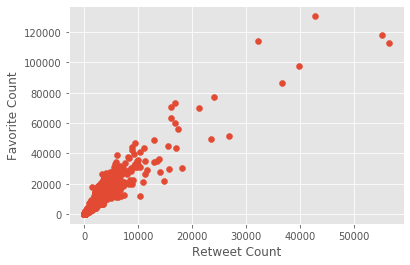

In [167]:
matplotlib.style.use('ggplot')
#plt.style.use(['dark_background'])
plt.scatter(df_final["retweet_count"], df_final["favorite_count"])
plt.xlabel("Retweet Count")
plt.ylabel("Favorite Count")
plt.show()

#### Insight 2: Correlation Between Retweet Counts and Numerator Rating

In [168]:
df_final["retweet_count"].corr(df_final["rating_numerator_new"])

0.04927317123551428

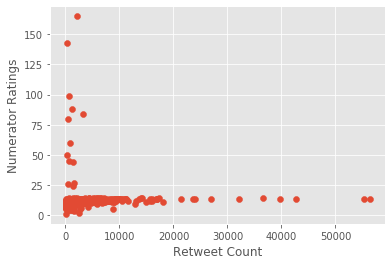

In [169]:
matplotlib.style.use('ggplot')
plt.scatter(df_final["retweet_count"], df_final["rating_numerator_new"])
plt.xlabel("Retweet Count")
plt.ylabel("Numerator Ratings")
plt.show()

#### Insight 3: Rating vs Dog Stage
Source of the code found below [3]

In [170]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
# create a list of our conditions
conditions = [
    (df_final['rating_numerator_new'] <= 10),
    (df_final['rating_numerator_new'] > 10)
    ]

# create a list of the values we want to assign for each condition
values = ['Low Rating', 'High Rating']

# create a new column and use np.select to assign values to it using our lists as arguments
df_final['Rating Classification'] = np.select(conditions, values)

# display updated DataFrame
df_final.sample(3)

,tweet_id,timestamp,text,rating_denominator,name,rating,rating_numerator_new,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf,Rating Classification
104,867421006826221569,2017-05-24 16:44:18,This is Shikha. She just watched you drop a skittle on the ground and still eat it. Could not be less impressed. 12/10 superior puppo https://t.co/XZlZKd73go,10,Shikha,12/10,12,puppo,2270,15026,https://pbs.twimg.com/media/DAmyy8FXYAIH8Ty.jpg,1,Eskimo_dog,61.65,Siberian_husky,38.13,malamute,0.17,High Rating
1135,696488710901260288,2016-02-08 00:20:23,12/10 revolutionary af https://t.co/zKzq4nIY86,10,None,12/10,12,NaN,991,2453,https://pbs.twimg.com/media/CapsyfkWcAQ41uC.jpg,1,briard,36.91,Scotch_terrier,16.82,giant_schnauzer,12.06,High Rating
325,819588359383371776,2017-01-12 16:54:26,This is Jazzy. She just found out that sandwich wasn't for her. Shocked and puppalled. 13/10 deep breaths Jazzy https://t.co/52cItP0vIO,10,Jazzy,13/10,13,puppo,1975,9591,https://pbs.twimg.com/media/C1_DQn3UoAIoJy7.jpg,1,Cardigan,54.79,basenji,11.64,Shetland_sheepdog,10.17,High Rating


In [171]:
df_final.groupby('Rating Classification')['dog_stage'].value_counts(normalize=True, ascending=False)

Rating Classification  dog_stage
High Rating            puppo        0.372470
                       pupper       0.356275
                       doggo        0.186235
                       floofer      0.085020
Low Rating             pupper       0.472527
                       puppo        0.395604
                       doggo        0.120879
                       floofer      0.010989
Name: dog_stage, dtype: float64

#### Insight 4: Most Common Dog Stage

In [172]:
df_final.dog_stage.value_counts(normalize=True)

pupper     0.387574
puppo      0.378698
doggo      0.168639
floofer    0.065089
Name: dog_stage, dtype: float64

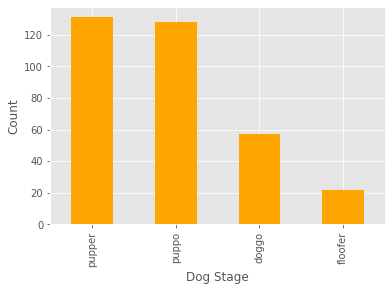

In [173]:
df_final.dog_stage.value_counts(normalize=False).plot(kind='bar', color='orange');
plt.xlabel("Dog Stage");
plt.ylabel("Count");

#### Insight 5: Retweet Count vs Dog Stage

In [174]:
df_final[['retweet_count']].describe()

,retweet_count
count,1196.000000
mean,2365.037625
std,4123.030563
min,11.000000
25%,553.500000
50%,1209.500000
75%,2731.500000
max,56373.000000


In [175]:
# create a list of our conditions
conditions_retweet = [
    (df_final['retweet_count'] <= 554),
    (df_final['retweet_count'] > 554) & (df_final['retweet_count'] <= 1210),
    (df_final['retweet_count'] > 1210) & (df_final['retweet_count'] <= 2732),
    (df_final['retweet_count'] > 2732)
    ]

# create a list of the values we want to assign for each condition
values_retweet = ['Low Retweet Count', 'Moderate Retweet Count', 'High Retweet Count' , 'Very High Retweet Count']

# create a new column and use np.select to assign values to it using our lists as arguments
df_final['Retweet Count Classification'] = np.select(conditions_retweet, values_retweet)

# display updated DataFrame
df_final.sample(3)

,tweet_id,timestamp,text,rating_denominator,name,rating,rating_numerator_new,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf,Rating Classification,Retweet Count Classification
576,772826264096874500,2016-09-05 15:58:34,Meet Roosevelt. He's preparing for takeoff. Make sure tray tables are in their full pupright &amp; licked position\n11/10 https://t.co/7CQkn3gHOQ,10,Roosevelt,11/10,11,puppo,2326,7967,https://pbs.twimg.com/media/CrmhYYIXEAEcyYY.jpg,1,basset,91.54,Walker_hound,7.24,beagle,0.82,High Rating,High Retweet Count
1090,699788877217865730,2016-02-17 02:54:04,Say hello to Nala. She's a Freckled High Bruschetta. Petable af. 12/10 https://t.co/5bjrIRqByp,10,Nala,12/10,12,NaN,498,2179,https://pbs.twimg.com/media/CbYmRHyWEAASNzm.jpg,1,Border_terrier,35.51,toy_poodle,16.97,Norwegian_elkhound,9.99,High Rating,Low Retweet Count
1570,674036086168010753,2015-12-08 01:21:40,Meet Daisy. She has no eyes &amp; her face has been blurry since birth. Quite the trooper tho. Still havin a blast. 9/10 https://t.co/jcNdw43BIP,10,Daisy,9/10,9,NaN,193,812,https://pbs.twimg.com/media/CVqoPslWEAEk7EC.jpg,1,toy_poodle,68.56,miniature_poodle,15.19,Maltese_dog,4.55,Low Rating,Low Retweet Count


In [176]:
df_final.groupby('Retweet Count Classification')['dog_stage'].value_counts(normalize=True, ascending=False)

Retweet Count Classification  dog_stage
High Retweet Count            puppo        0.417582
                              pupper       0.263736
                              doggo        0.230769
                              floofer      0.087912
Low Retweet Count             pupper       0.509091
                              puppo        0.381818
                              doggo        0.109091
Moderate Retweet Count        pupper       0.547368
                              puppo        0.263158
                              doggo        0.115789
                              floofer      0.073684
Very High Retweet Count       puppo        0.453608
                              pupper       0.278351
                              doggo        0.195876
                              floofer      0.072165
Name: dog_stage, dtype: float64

#### Insight 6: Favorite Count vs Dog Stage

In [177]:
df_final[['favorite_count']].describe()

,favorite_count
count,1196.000000
mean,8402.051003
std,12113.356755
min,70.000000
25%,1980.250000
50%,4009.000000
75%,10429.750000
max,130513.000000


In [178]:
# create a list of our conditions
conditions_favorite = [
    (df_final['favorite_count'] <= 1981),
    (df_final['favorite_count'] > 1981) & (df_final['favorite_count'] <= 4009),
    (df_final['favorite_count'] > 4009) & (df_final['favorite_count'] <= 10430),
    (df_final['favorite_count'] > 10430)
    ]

# create a list of the values we want to assign for each condition
values_favorite = ['Low Favorite Count', 'Moderate Favorite Count', 'High Favorite Count' , 'Very High Favorite Count']

# create a new column and use np.select to assign values to it using our lists as arguments
df_final['Favorite Count Classification'] = np.select(conditions_favorite, values_favorite)

# display updated DataFrame
df_final.sample(3)

,tweet_id,timestamp,text,rating_denominator,name,rating,rating_numerator_new,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf,Rating Classification,Retweet Count Classification,Favorite Count Classification
931,714982300363173890,2016-03-30 01:07:18,This is Calbert. He forgot to clear his Google search history. 9/10 rookie mistake Calbert https://t.co/jRm5J3YCmj,10,Calbert,9/10,9,NaN,1005,3630,https://pbs.twimg.com/media/CewgnHAXEAAdbld.jpg,1,Brittany_spaniel,94.44,beagle,2.54,Ibizan_hound,1.00,Low Rating,Moderate Retweet Count,Moderate Favorite Count
1940,666804364988780544,2015-11-18 02:25:23,This is Jockson. He is a Pinnacle Sagittarius. Fancy bandana. Enjoys lightly sucking on hot dog in nature. 8/10 https://t.co/RdKbAOEpDK,10,Jockson,8/10,8,NaN,84,218,https://pbs.twimg.com/media/CUD3A7YWoAA82N0.jpg,1,English_setter,32.88,Brittany_spaniel,28.35,Ibizan_hound,5.75,Low Rating,Low Retweet Count,Low Favorite Count
75,874680097055178752,2017-06-13 17:29:20,Meet Cash. He hath acquired a stick. A very good stick tbh. 12/10 would pat head approvingly https://t.co/lZhtizkURD,10,Cash,12/10,12,NaN,4152,25737,https://pbs.twimg.com/media/DCN85nGUwAAzG_q.jpg,1,Labrador_retriever,83.61,Staffordshire_bullterrier,4.71,beagle,3.60,High Rating,Very High Retweet Count,Very High Favorite Count


In [179]:
df_final.groupby('Favorite Count Classification')['dog_stage'].value_counts(normalize=True, ascending=False)

Favorite Count Classification  dog_stage
High Favorite Count            puppo        0.421687
                               pupper       0.253012
                               doggo        0.228916
                               floofer      0.096386
Low Favorite Count             pupper       0.527273
                               puppo        0.381818
                               doggo        0.090909
Moderate Favorite Count        pupper       0.581633
                               puppo        0.234694
                               doggo        0.102041
                               floofer      0.081633
Very High Favorite Count       puppo        0.480392
                               pupper       0.235294
                               doggo        0.225490
                               floofer      0.058824
Name: dog_stage, dtype: float64

### Dog Breed Analysis

A new dataframe was created which consisted of the most confident first prediction for the image in the tweet. So I included the data for which the confidence of the first prediction was from 90 to 100 percent. The method used to obtain the dataframe can be found here [4].

In [180]:
df_most_confident_10pec = df_final.loc[(df_final['p1_conf'] >= 90) & (df_final['p1_conf'] <= 100)]
print(df_most_confident_10pec.shape)

(233, 21)


#### Insight 7: Six Most Common Breed 

In [181]:
df_most_confident_10pec.p1.value_counts(normalize=True)[0:6]

golden_retriever      0.124464
Pembroke              0.107296
pug                   0.077253
Pomeranian            0.064378
Labrador_retriever    0.051502
French_bulldog        0.047210
Name: p1, dtype: float64

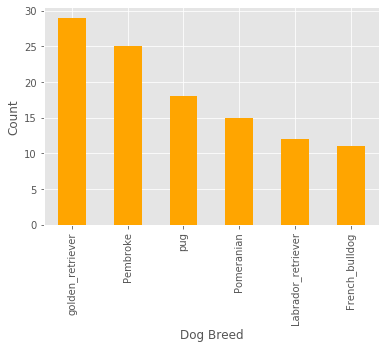

In [182]:
df_most_confident_10pec.p1.value_counts(normalize=False)[0:6].plot(kind='bar', color='orange');
plt.xlabel("Dog Breed");
plt.ylabel("Count");

#### Insight 8: Dog Stages and Dog Breed

Source of the code found below [5]

In [183]:
df_most_confident_10pec.groupby('dog_stage')['p1'].value_counts(normalize=True).loc[lambda x : x>.079] 

dog_stage  p1                            
doggo      golden_retriever                  0.400000
           Doberman                          0.200000
           Leonberg                          0.200000
           Samoyed                           0.200000
floofer    Samoyed                           0.500000
           chow                              0.250000
           American_Staffordshire_terrier    0.125000
           Pomeranian                        0.125000
pupper     Pomeranian                        0.160000
           Bernese_mountain_dog              0.080000
           French_bulldog                    0.080000
           Labrador_retriever                0.080000
           golden_retriever                  0.080000
           pug                               0.080000
puppo      Labrador_retriever                0.153846
           golden_retriever                  0.153846
           Pembroke                          0.115385
           pug                          

#### Insight 9: Retweet Count vs Dog Breed

In [184]:
df_most_confident_10pec.groupby('Retweet Count Classification')['p1'].value_counts(normalize=True, ascending=False).loc[lambda x : x>.08]

Retweet Count Classification  p1                
High Retweet Count            golden_retriever      0.140351
                              Pembroke              0.105263
Low Retweet Count             golden_retriever      0.120690
                              Labrador_retriever    0.086207
Moderate Retweet Count        pug                   0.160000
                              Pomeranian            0.120000
Very High Retweet Count       Pembroke              0.220588
                              golden_retriever      0.176471
                              Samoyed               0.102941
Name: p1, dtype: float64

#### Insight 10: Rating vs Dog Breed

In [185]:
df_most_confident_10pec.groupby('Rating Classification')['p1'].value_counts(normalize=True, ascending=False).loc[lambda x : x>.07] 

Rating Classification  p1              
High Rating            Pembroke            0.151899
                       golden_retriever    0.145570
Low Rating             pug                 0.120000
                       Chihuahua           0.080000
                       golden_retriever    0.080000
Name: p1, dtype: float64

#### Insight 11: Favorite Count vs Breed

In [186]:
df_most_confident_10pec.groupby('Favorite Count Classification')['p1'].value_counts(normalize=True, ascending=False).loc[lambda x : x>.05]#.plot(kind='bar')

Favorite Count Classification  p1                
High Favorite Count            Pembroke              0.081967
                               golden_retriever      0.081967
                               Pomeranian            0.065574
Low Favorite Count             golden_retriever      0.107143
                               Labrador_retriever    0.089286
                               pug                   0.089286
                               Blenheim_spaniel      0.071429
                               Chihuahua             0.071429
                               Pomeranian            0.053571
Moderate Favorite Count        Pomeranian            0.129630
                               pug                   0.129630
                               golden_retriever      0.074074
                               Chihuahua             0.055556
                               Pembroke              0.055556
Very High Favorite Count       Pembroke              0.241935
                    

## References

[1] https://stackoverflow.com/questions/21702342/creating-a-new-column-based-on-if-elif-else-condition                                                                                         
[2] https://stackoverflow.com/questions/19937362/python-pandas-filter-string-data-based-on-its-string-length                                                                                   
[3] https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/                                                                                             
[4] https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values                                                                                   
[5] https://re-thought.com/pandas-value_counts/

Other References:                                                                                                                                                                             
https://www.shanelynn.ie/merge-join-dataframes-python-pandas-index-1/                                                                                                                         
https://twitter.com/dog_rates                                                                                                                                                                 
https://campus.datacamp.com/courses/analyzing-social-media-data-in-python/processing-twitter-text?ex=4                                                                                        
https://www.w3schools.com/python/python_regex.asp                                                                                                                                             
https://stackoverflow.com/questions/36536495/capitalized-words-with-regular-expression?rq=1